# Topic 2: Estimation and the Bayes Classifier
 
## Associated Reading: Bishop 2.2, 1.5

### 2.1 Parameterized probability
In the above examples, we've been using something called a *probability table*, in which we explicitly enumerate all possible cases

| y | P(Y=y)   |
|------|------|
|   Orange  | 0.25 |
|   Kiwi    | 0.75 |

This table is a valid way to specify the function from $y$ to its probability.  However, in general we'd like to be able to write these tables more succinctly, particularly when the number of possible values that $y$ could take becomes very large: indeed, it's reasonable to imagine that $Y$ may be a real-valued random variable, in which case there would be an infinite number of entries in the probability table (this actually breaks down in some sense, because the probability of drawing any particular real value from a distribution is zero: instead we think about probability densities.  More soon).  Instead of writing down tables of probabilities, we'll instead introduce a *parameterized* function that maps from a given outcome to a probability.  We'll work with a few of these distributions throughout the course, but we'll start with the simplest, and among the most useful.  

### 2.2 The Bernoulli Distribution
The Bernoulli distribution is the distribution that gives the probability of two mutually exclusive events.  The most common example of such a scenario is a coin flip, but, as we'll see, there are lots of other situations that can be modelled similarly.  The Bernoulli distribution has the *probability mass function* 
$$ P(Y=y) = \mathrm{Bernoulli}(Y=y;\theta) = \theta^y (1-\theta)^{1-y} $$
where $y\in\{0,1\}$ indicates "success" or "failure".  **For a fair coin, what should be the value of $\theta$?  What is P(Y=1) and P(Y=0) for a fair coin?  What is the parameter that controls this function?**

This isn't actually very different from a probability table. If we were to look at the table giving the probability of orange versus kiwi, we might encode "draw an orange $\equiv 1$, in which case the table could equivalently be written as $P(Y) = \mathrm{Bernoulli}(Y;\theta=0.25)$.  Just for clarity, it's worth evaluating this function for the values 1 and 0:
$$
P(Y=1) = \theta^1 (1-\theta)^0 = \theta
$$
$$
P(Y=0) = \theta^0 (1-\theta)^1 = 1-\theta.
$$
Thus, the probability of drawing a 1 (or a heads, or an orange) is $\theta$, and the probability of drawing a 0 (or a tails, or a kiwi) is $1-\theta$.  Cool, but where does $\theta$ come from?    

### 2.3 Inferring $\theta$
Imagine a scenario: we are given a coin, and we want to determine whether it is fair (i.e. $\theta=0.5$) or not.  Of course, we have access to flips from the coin (to begin with, let's imagine that we have the result of a single coin flip).  Bayes' theorem then would be
$$
P(\theta|Y=y) = \frac{P(Y=y|\theta)P(\theta)}{P(Y=y)},
$$
which is to say that if we have the result of some coin flips $Y=y$, we can *update* our belief in what $\theta$ should be.  Note that using Bayes' theorem gives us a probability distribution over $\theta$, which is real-valued!  Similarly, $P(\theta)$, which is the prior is also a probability distribution over $\theta$.  For a judicious choice of the prior distribution (a Beta distribution), it turns our that we can actually evaluate Bayes' theorem in closed form exactly for this problem.  However, doing full Bayesian inference of this type is usually pretty hard (methods for doing this would be the subject of a Bayesian Statistics class, although they will show up in CSCI 557: Deep Learning as well).  **For now, let's punt, by which I mean let's see if we can figure out a way to solve a simpler problem.**  In particular, we'll try to solve the problem of estimating just the maximum of the posterior distribution, the most probable value of $\theta$ given the observed coin flip, which turns out to be much easier.

First, let's start with the prior distribution $P(\theta)$.  Recall that this encodes our belief in what $\theta$ should be prior to having looked at any data.  It asks the question, "do you trust the coin flipper?"  A very easy assumption, and one that will greatly simplify this particular analysis is to say that *we have no idea:* before looking at the data, any value of $\theta$ is as likely as any other.  The way that we can encode this assumption is to say that $P(\theta)=c$, where $c$ is some constant.  Thus we now have that
$$
P(\theta|Y=y) = \frac{c P(Y=y|\theta)}{P(Y=y)}.
$$
Here's an important fact that you'll want to remember for the rest of your life: scaling the function to be minimized by a constant doesn't make a difference in that maximum's location.  $c$ is not a function of $\theta$, so it won't have any effect on determining which value of $\theta$ maximizes the posterior probability.  However, we could also say the same thing about the denominator: it's not a function of $\theta$, so it doesn't influence where the maximum of the posterior is with respect to $\theta$.  Thus we could simply rewrite Bayes' theorem as:
$$
P(\theta|Y=y) \propto P(Y=y|\theta),
$$
with the symbol $\propto$ meaning 'proportional to' or equal up to a multiplicative constant.  For the purposes of finding the maximum, 'proportional to' is just as good as 'equal to.'  

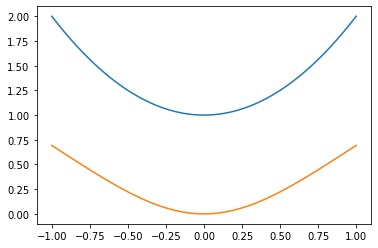

50 50


In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,1,101)
y = x**2 + 1
logy = np.log(y)
plt.plot(x,y)
plt.plot(x,logy)
plt.show()
print(np.argmin(y),np.argmin(logy))

Now, all that's left is to specify the *likelihood*.  Recall that the likelihood is asking the question: if I assume a model, what's the probability of observing the data?  Specific to this problem, it's asking: if I know $\theta$, how likely is it that I should have observed a heads?  Of course, we already know how to model that situation: that's just the Bernoulli distribution that we developed above.  For a single coin flip, that's
$$
P(\theta|Y=y) \propto P(Y=y|\theta) = \theta^y (1-\theta)^{1-y}.
$$
Let's make it explicit that we want to find the most probable value of theta:
\begin{align}
\hat{\theta} & = \mathrm{argmax}_\theta P(\theta|Y=y) \\
             & = \mathrm{argmax}_\theta P(Y=y|\theta) \\
             & = \mathrm{argmax}_\theta \theta^y (1-\theta)^{1-y}.
\end{align}
This says that the most likely value of $\theta$ is the one that makes the data most likely to have occurred.  Often times, this is called *maximum likelihood estimation*.  Now all we need to do is figure out how to maximize it!

It turns out that it will be much easier to maximize the *logarithm* of the probability.  It will be clearer why this is easier in a moment; rest assured, since logarithms are a monotonic function (i.e. $x\ge y \iff \ln x \ge \ln y$), taking the logarithm does not change the location of the minimum.  The log of the likelihood is 
$$
\ln P(Y=y|\theta) = y \ln \theta + (1-y) \ln (1-\theta)
$$
Setting this equal to zero and taking the derivative with respect to theta yields
$$
\frac{y}{\theta} - \frac{1-y}{1-\theta} = 0 \rightarrow \theta = y.
$$
This is sort of a funny result: it says that if we flip a coin one time and it comes up heads, our best option is to assume that the next coin flip will also be heads, with 100% certainty.  This is, however, exactly what we asked of Bayes' theorem: by using an uninformative prior distribution, we said that $\theta$ could be *any value with equal probability*.  What else do we have to go on then?  Just the data, and the data tells us that 100% of the time (so far), the coin comes up heads.  

#### ASIDE: The influence of a prior distribution
This is obviously not an ideal model of coin flips, and it perhaps the simplest case of overfitting imaginable.  We have two paths forward.

First, we could specify a more sensible prior distribution on $\theta$.  We don't need to go through the math on this, but the typical way forward would be to assume that $\theta$ is distributed according to a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution).   Setting such a prior can be viewed as including *synthetic observations*.  The resulting best estimate (called Maximum a Posteriori estimate or MAP) of $\theta$ is given by
$$
\theta = \frac{y + M^+}{1 + M^+ + M^-},
$$
where $M^+$ is the number of synthetic heads, and $M^-$ is the number of synthetic tails.  As an example, if we assumed that we had taken ten synthetic coin flips, five of which were heads, and five of which were tails, and our *real* flip is a heads.  Then we have that
$$
\theta = \frac{ 1 + 5}{1 + 5 +5} = \frac{6}{11}.
$$
Thus, our prior belief that the coin was fair (because we made our synthetic coin flips equal between heads and tails) keeps our one *new* coin flip from adjusting our belief in the value of $\theta$ too much.

Secondly, we could simply collect more data.

**How about for two coin flips?** 

Inferring the degree of weightedness for a coin based on a single coin flip is tenuous at best: if we really want to know, we should probably flip the coin at least twice.  If we assume that the results of the two coin flips are not directly dependent upon one another (which is to say that they are *independent*), then we can simply write this as 
$$
P(Y_1=y_1,Y_2=y_2|\theta) = P(Y_1=y_1|\theta) P(Y_2=y_2|\theta)
$$
More generally, for an arbitrary number of coin flips $m$, we have that
$$
P(\mathbf{y}|\theta) = \prod_{i=1}^m \theta^{y_i} (1-\theta)^{1-y_i}
$$,
where $\mathbf{y}$ is a vector of length $m$ containing the results of our $m$ coin flips.

While not easily done in general, for this simple problem we can actually plot this likelihood as a function of $\theta$ for a simulated set of coin flips.

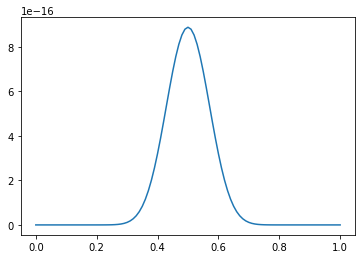

In [6]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
# random coin flips
y = np.random.randint(0,2,50)

# Array of thetas
theta = np.linspace(0,1,101)
# Array to hold the posterior values of theta

# Move the product inside the exponent to produce a sum
post = theta**np.sum(y)*(1-theta)**np.sum(1-y)
    
# Plot the resulting function of theta
plt.plot(theta,post)
plt.show()

Now, we just need to find the value of $\theta$ that maximizes this function.  We do this exactly the same way as above: by taking the derivative of likelihood and setting it equal to zero.  Taking derivatives of *products* is hard (think about the product rule from calculus), and this is the real reason why we like working with the logarithm instead: it converts products to sums!  Taking the log is pretty easy:
$$
\ln \left[\prod_{i=1}^m \theta^{y_i} (1-\theta)^{1-y_i}\right] = \sum_{i=1}^m y_i \ln \theta + (1-y_i)\ln (1-\theta)
$$
Note that this quantity, the logarithm of the Bernoulli distribution, is also called the *cross-entropy*.  We will return to it later.  Now, all that's left is to take the derivative
$$
\frac{\partial}{\partial \theta}\sum_{i=1}^m y_i \ln \theta + (1-y_i)\ln (1-\theta) = \left[\sum_{i=1}^m \frac{y_i}{\theta} - \frac{1-y_i}{1-\theta}\right],
$$
set it equal to zero and solve for $\theta$
$$
\theta = \frac{\sum_{i=1}^m y_i}{m}
$$

This specific result is called the Maximum Likelihood Estimator (MLE) for a Bernoulli model.  Given the data, it tells us what the most likely value for $\theta$, or alternatively, whether the coin is loaded or not.

## In-class exercise: Ham vs Spam
One use of the naive Bayes classifier, which is still in practical use today, is as a spam filter.  Consider the corpus of text messages packaged with this homework, which are each labelled as either 'spam' or 'ham'.  In this case, naive Bayes utilizes a Bernoulli model that quantifies the probability of a given word given that the message is either spam or ham.  For example, investigating the text messages here, we find that the word *draw* shows up in spam 27 times, implying that
$$P(X=\mathrm{draw}|Y=\mathrm{spam}) = \frac{27}{25748} = \frac{m_{draw,spam}}{m_{spam}},$$
while in the case of ham, it shows up 5 times so
$$P(X=\mathrm{draw}|Y=\mathrm{ham}) = \frac{5}{67148} = \frac{m_{draw,ham}}{m_{ham}}.$$
Thus we see that the word 'draw' shows up with a much higher frequency in spam e-mails than in ham.

While this is not particularly strong evidence on its own, we can create a powerful classifier by using the naive assumption in conjunction with all the words in a given message:
$$ P(Y=\mathrm{ham}|X=x) \propto P(Y=\mathrm{ham}) \prod_{i=1}^n P(X_i=x_i|Y=\mathrm{ham}), $$
$$ P(Y=\mathrm{spam}|X=x) \propto P(Y=\mathrm{spam}) \prod_{i=1}^n P(X_i=x_i|Y=\mathrm{spam}), $$
where $x_i$ are the words in a given message. 

Your task is to write such a classifier.  I have taken the somewhat tedious step of parsing the data for you, yielding the variables *word_dictionary*, which contains the ham and spam counts for each word, as well as *training_labels*, which provides the spam/ham labels for each text message.  I have also parsed a set of test data: *test_messages* is a list, each entry containing another list of the words in the text message, as well as *test_labels* which contains the spam/ham label for each message.

In [7]:
import numpy as np

# Maps from 'ham' or 'spam' strings to zero or one
def mapper(s):
    if s=='spam':
        return 0
    else:
        return 1

# Read in the text file
f = open('SMSSpamCollection','r')
lines = f.readlines()

# Break out the test data
test_lines = lines[:len(lines)//5]
lines = lines[len(lines)//5:]

# Instantiate the frequency dictionary and an array to
# record whether the line is ham or spam
word_dictionary = {}
training_labels = np.zeros(len(lines),dtype=int)

# Loop over all the training messages
for i,l in enumerate(lines):
    # Split into words
    l = l.lower().split()
    # Record the special first word which always ham or spam
    if l[0]=='ham':
        training_labels[i] = 1
    # For each word in the message, record whether the message was ham or spam
    for w in l[1:]:
        # If we've never seen the word before, add a new dictionary entry
        if w not in word_dictionary:
            word_dictionary[w] = [1,1]
        word_dictionary[w][mapper(l[0])] += 1
        
# Loop over the test messages
test_labels = np.zeros(len(test_lines),dtype=int)
test_messages = []
for i,l in enumerate(test_lines):
    l = l.lower().split()
    if l[0]=='ham':
        test_labels[i] = 1
    test_messages.append(l)

counts = np.array([v for v in word_dictionary.values()]).sum(axis=0)
print(counts)

[25748 67183]


Below, I have provided code skeletons. Your job is to make the code skeletons into an operational naive Bayes spam detector. (you may discard these skeletons if you would prefer to code this from scratch). Note that lines where you will need to change the code are marked with a '#!'.

Your first task is train the model:

In [8]:
#What is the prior P(Y=ham) ?
ham_prior = #!
spam_prior = #!

# What are the class probabilities P(X=word|Y=ham) for each word?
ham_likelihood = {}
spam_likelihood = {}
for key,val in word_dictionary.items():
    ham_likelihood[key] =  #!
    spam_likelihood[key] = #!

SyntaxError: invalid syntax (3353194089.py, line 2)

Your next task is to make predictions on a set of test examples which were held back from the training procedure (see *test_messages* variable).  For each of these messages, compute the ham and spam probabilities.

In [ ]:
# Where to hold the ham and spam posteriors
posteriors = np.zeros((len(test_lines),2))

# Loop over all the messages in the test set
for i,m in enumerate(test_messages):
    posterior_ham = 1.0
    posterior_spam = 1.0
    #! Don't forget to include the prior!
    # Loop over all the words in each message
    for w in m:
        # #! What is the purpose of this try/except handler?
        try:
            posterior_ham *= 1 #!
            posterior_spam *= 1 #!
        except KeyError:
            pass
    
    # Notice the normalization factor (denominator) 
    # to turn these into proper probabilities!
    posteriors[i,0] = posterior_spam/(posterior_spam + posterior_ham)
    posteriors[i,1] = posterior_ham/(posterior_spam + posterior_ham)

Finally, **make a ham/spam prediction based on your posterior probabilities.  Compare these to the labels contained in test_labels.  Report the accuracy of your classifier as percentage correct.**